## Análisis de datos - Clase 3

### Datos faltantes

In [ ]:
#!pip install missingno
#!conda install missingno
#!poetry add missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Cargamos el dataset de Titanic de Seaborn
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Convertimos columnas al tipo correcto
titanic_df['survived'] = titanic_df['survived'].astype('category')
titanic_df['sex'] = titanic_df['sex'].astype('category')
titanic_df['class'] = titanic_df['class'].astype('category')
titanic_df['embark_town'] = titanic_df['embark_town'].astype('category')


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(5), float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [ ]:
titanic_df.describe(include='category')

# count = cant. de datos no nulos
# unique = cantidad de categorias distintas
# top = categoria con mayor frecuencia
# freq = frecuencia de la categoria top

,survived,sex,class,deck,embark_town
count,891,891,891,203,889
unique,2,2,3,7,3
top,0,male,Third,C,Southampton
freq,549,577,491,59,644


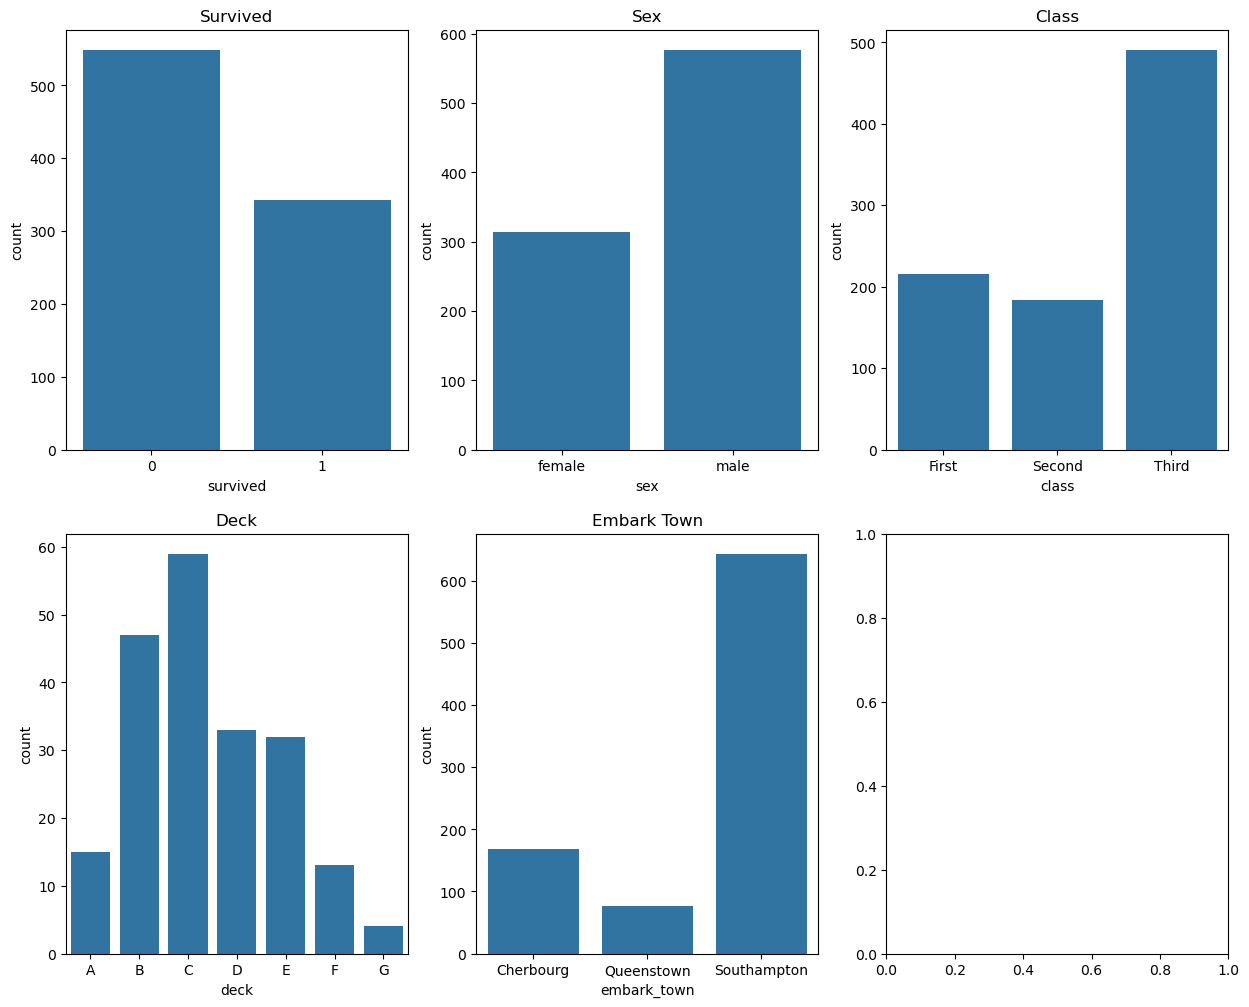

In [ ]:
# Crear cada cajita
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Gráficos de barras de cada una
sns.countplot(x='survived', data=titanic_df, ax=ax[0,0])
sns.countplot(x='sex', data=titanic_df, ax=ax[0,1])
sns.countplot(x='class', data=titanic_df, ax=ax[0,2])
sns.countplot(x='deck', data=titanic_df, ax=ax[1,0])
sns.countplot(x='embark_town', data=titanic_df, ax=ax[1,1])

# Títulos
ax[0,0].set_title('Survived')
ax[0,1].set_title('Sex')
ax[0,2].set_title('Class')
ax[1,0].set_title('Deck')
ax[1,1].set_title('Embark Town')

plt.show()

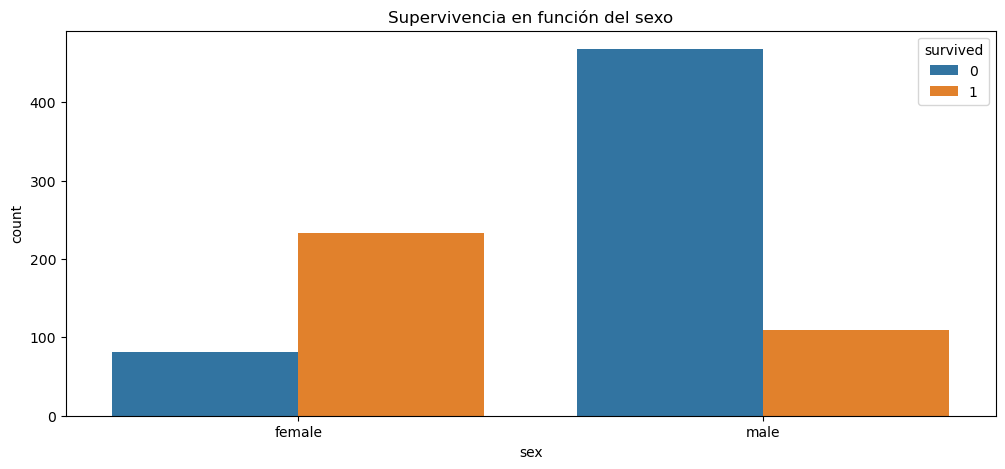

In [10]:
# Cuántas personas sobrevivieron de cada sexo?
plt.figure(figsize=(12, 5))
sns.countplot(x='sex', hue='survived', data=titanic_df)
plt.title("Supervivencia en función del sexo")
plt.show()
